<a href="https://colab.research.google.com/github/Raman-Dhillon/COVID_19-Prediction/blob/main/COVID_19_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense,
    Dropout, BatchNormalization, GlobalAveragePooling2D
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.keras.applications import MobileNetV2, ResNet50

In [10]:
!git clone https://github.com/RishitToteja/Chext-X-ray-Images-Data-Set.git


Cloning into 'Chext-X-ray-Images-Data-Set'...
remote: Enumerating objects: 2319, done.
remote: Total 2319 (delta 0), reused 0 (delta 0), pack-reused 2319 (from 1)
Receiving objects: 100% (2319/2319), 1.31 GiB | 15.06 MiB/s, done.
Updating files: 100% (2296/2296), done.


In [11]:
BASE_DIR = "/content/Chext-X-ray-Images-Data-Set/DataSet/Data"
train_dir = os.path.join(BASE_DIR, "train")
test_dir  = os.path.join(BASE_DIR, "test")

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 25

In [12]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="training"
)

val_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="validation"
)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False
)


Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [13]:
def get_callbacks(model_name):
    return [
        EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
        ModelCheckpoint(f"{model_name}.h5", save_best_only=True)
    ]

**CNN**

In [14]:
def build_custom_cnn():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
        BatchNormalization(),
        MaxPooling2D(2,2),

        Conv2D(64, (3,3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2,2),

        Conv2D(128, (3,3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2,2),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=Adam(1e-4),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model


cnn_model = build_custom_cnn()
cnn_model.summary()

cnn_history = cnn_model.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen,
    callbacks=get_callbacks("cnn_model")
)

cnn_acc = cnn_model.evaluate(test_gen)[1]


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,985 (42.61 MB)

 Trainable params: 11,169,537 (42.61 MB)

 Non-trainable params: 448 (1.75 KB)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8312 - loss: 0.8661

46/46 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.8326 - loss: 0.8577 - val_accuracy: 0.3011 - val_loss: 7.2097
Epoch 2/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.9644 - loss: 0.1025 - val_accuracy: 0.3011 - val_loss: 11.1115
Epoch 3/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.9604 - loss: 0.1285 - val_accuracy: 0.3011 - val_loss: 14.5431
Epoch 4/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.9701 - loss: 0.1123 - val_accuracy: 0.3011 - val_loss: 12.8673
Epoch 5/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.9634 - loss: 0.0804 - val_accuracy: 0.3011 - val_loss: 13.2819
Epoch 6/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.9784 - loss: 0.0764 - val_accuracy: 0.3011 - val_loss: 8.3799
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 647ms/step - accuracy: 0.6524 - loss: 3.5170


**MobileNetV2**

In [15]:
def build_mobilenet():
    base = MobileNetV2(
        weights="imagenet",
        include_top=False,
        input_shape=(224,224,3)
    )
    base.trainable = False

    x = base.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation="relu")(x)
    x = Dropout(0.5)(x)
    output = Dense(1, activation="sigmoid")(x)

    model = Model(inputs=base.input, outputs=output)

    model.compile(
        optimizer=Adam(1e-4),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model


mobilenet_model = build_mobilenet()
mobilenet_model.summary()

mobilenet_history = mobilenet_model.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen,
    callbacks=get_callbacks("mobilenet_model")
)

mobilenet_acc = mobilenet_model.evaluate(test_gen)[1]

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6251 - loss: 0.6608

46/46 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.6281 - loss: 0.6569 - val_accuracy: 0.9392 - val_loss: 0.2213
Epoch 2/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 945ms/step - accuracy: 0.9435 - loss: 0.1957

46/46 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.9435 - loss: 0.1954 - val_accuracy: 0.9448 - val_loss: 0.1501
Epoch 3/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 924ms/step - accuracy: 0.9601 - loss: 0.1368

46/46 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.9601 - loss: 0.1366 - val_accuracy: 0.9696 - val_loss: 0.1142
Epoch 4/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 934ms/step - accuracy: 0.9540 - loss: 0.1172

46/46 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.9542 - loss: 0.1169 - val_accuracy: 0.9613 - val_loss: 0.0982
Epoch 5/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 928ms/step - accuracy: 0.9689 - loss: 0.0950

46/46 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.9689 - loss: 0.0948 - val_accuracy: 0.9807 - val_loss: 0.0733
Epoch 6/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9765 - loss: 0.0777 - val_accuracy: 0.9751 - val_loss: 0.0758
Epoch 7/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 926ms/step - accuracy: 0.9559 - loss: 0.0937

46/46 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.9562 - loss: 0.0931 - val_accuracy: 0.9807 - val_loss: 0.0705
Epoch 8/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 923ms/step - accuracy: 0.9731 - loss: 0.0669

46/46 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9732 - loss: 0.0668 - val_accuracy: 0.9862 - val_loss: 0.0544
Epoch 9/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.9775 - loss: 0.0632 - val_accuracy: 0.9807 - val_loss: 0.0554
Epoch 10/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.9850 - loss: 0.0481 - val_accuracy: 0.9807 - val_loss: 0.0582
Epoch 11/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9856 - loss: 0.0444 - val_accuracy: 0.9862 - val_loss: 0.0550
Epoch 12/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.9862 - loss: 0.0435 - val_accuracy: 0.9751 - val_loss: 0.0606
Epoch 13/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 944ms/step - accuracy: 0.9808 - loss: 0.0470

46/46 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.9808 - loss: 0.0471 - val_accuracy: 0.9834 - val_loss: 0.0501
Epoch 14/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 945ms/step - accuracy: 0.9852 - loss: 0.0461

46/46 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9852 - loss: 0.0461 - val_accuracy: 0.9890 - val_loss: 0.0488
Epoch 15/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 946ms/step - accuracy: 0.9921 - loss: 0.0369

46/46 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.9920 - loss: 0.0369 - val_accuracy: 0.9890 - val_loss: 0.0458
Epoch 16/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9834 - loss: 0.0416 - val_accuracy: 0.9807 - val_loss: 0.0511
Epoch 17/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 952ms/step - accuracy: 0.9895 - loss: 0.0315

46/46 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.9895 - loss: 0.0316 - val_accuracy: 0.9917 - val_loss: 0.0331
Epoch 18/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9932 - loss: 0.0328 - val_accuracy: 0.9917 - val_loss: 0.0381
Epoch 19/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9853 - loss: 0.0430 - val_accuracy: 0.9945 - val_loss: 0.0348
Epoch 20/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.9906 - loss: 0.0272 - val_accuracy: 0.9890 - val_loss: 0.0427
Epoch 21/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.9919 - loss: 0.0315 - val_accuracy: 0.9862 - val_loss: 0.0456
Epoch 22/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 948ms/step - accuracy: 0.9893 - loss: 0.0352

46/46 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.9893 - loss: 0.0351 - val_accuracy: 0.9917 - val_loss: 0.0331
Epoch 23/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.9928 - loss: 0.0225 - val_accuracy: 0.9862 - val_loss: 0.0398
Epoch 24/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 930ms/step - accuracy: 0.9911 - loss: 0.0252

46/46 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.9910 - loss: 0.0254 - val_accuracy: 0.9945 - val_loss: 0.0274
Epoch 25/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.9901 - loss: 0.0217 - val_accuracy: 0.9862 - val_loss: 0.0328
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9827 - loss: 0.0423


**ResNet50**

In [16]:
def build_resnet():
    base = ResNet50(
        weights="imagenet",
        include_top=False,
        input_shape=(224,224,3)
    )
    base.trainable = False

    x = base.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation="relu")(x)
    x = Dropout(0.5)(x)
    output = Dense(1, activation="sigmoid")(x)

    model = Model(inputs=base.input, outputs=output)

    model.compile(
        optimizer=Adam(1e-4),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model


resnet_model = build_resnet()
resnet_model.summary()

resnet_history = resnet_model.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen,
    callbacks=get_callbacks("resnet_model")
)

resnet_acc = resnet_model.evaluate(test_gen)[1]


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,112,513 (91.98 MB)

 Trainable params: 524,801 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6521 - loss: 0.6656

46/46 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.6526 - loss: 0.6652 - val_accuracy: 0.6989 - val_loss: 0.5981
Epoch 2/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 969ms/step - accuracy: 0.6797 - loss: 0.6375

46/46 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.6797 - loss: 0.6374 - val_accuracy: 0.6989 - val_loss: 0.5822
Epoch 3/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 940ms/step - accuracy: 0.7025 - loss: 0.5904

46/46 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.7024 - loss: 0.5907 - val_accuracy: 0.6989 - val_loss: 0.5743
Epoch 4/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 962ms/step - accuracy: 0.7099 - loss: 0.5823

46/46 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.7098 - loss: 0.5822 - val_accuracy: 0.6989 - val_loss: 0.5553
Epoch 5/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 959ms/step - accuracy: 0.7214 - loss: 0.5576

46/46 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.7212 - loss: 0.5577 - val_accuracy: 0.6989 - val_loss: 0.5419
Epoch 6/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 966ms/step - accuracy: 0.6990 - loss: 0.5631

46/46 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.6991 - loss: 0.5628 - val_accuracy: 0.6989 - val_loss: 0.5336
Epoch 7/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 921ms/step - accuracy: 0.7133 - loss: 0.5333

46/46 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.7133 - loss: 0.5332 - val_accuracy: 0.6989 - val_loss: 0.5226
Epoch 8/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 969ms/step - accuracy: 0.7042 - loss: 0.5391

46/46 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.7044 - loss: 0.5387 - val_accuracy: 0.6989 - val_loss: 0.5063
Epoch 9/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 965ms/step - accuracy: 0.7336 - loss: 0.5008

46/46 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.7335 - loss: 0.5011 - val_accuracy: 0.6989 - val_loss: 0.4944
Epoch 10/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 948ms/step - accuracy: 0.7236 - loss: 0.4991

46/46 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.7236 - loss: 0.4991 - val_accuracy: 0.7017 - val_loss: 0.4811
Epoch 11/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 936ms/step - accuracy: 0.7309 - loss: 0.4904

46/46 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.7311 - loss: 0.4904 - val_accuracy: 0.6989 - val_loss: 0.4754
Epoch 12/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 922ms/step - accuracy: 0.7614 - loss: 0.4801

46/46 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.7614 - loss: 0.4799 - val_accuracy: 0.7155 - val_loss: 0.4616
Epoch 13/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 936ms/step - accuracy: 0.7737 - loss: 0.4638

46/46 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.7735 - loss: 0.4637 - val_accuracy: 0.7376 - val_loss: 0.4524
Epoch 14/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 925ms/step - accuracy: 0.8133 - loss: 0.4528

46/46 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.8133 - loss: 0.4527 - val_accuracy: 0.7182 - val_loss: 0.4375
Epoch 15/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 908ms/step - accuracy: 0.7989 - loss: 0.4336

46/46 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.7992 - loss: 0.4336 - val_accuracy: 0.8508 - val_loss: 0.4228
Epoch 16/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8054 - loss: 0.4222 - val_accuracy: 0.8591 - val_loss: 0.4299
Epoch 17/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 920ms/step - accuracy: 0.8384 - loss: 0.4366

46/46 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.8385 - loss: 0.4364 - val_accuracy: 0.8094 - val_loss: 0.4085
Epoch 18/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 913ms/step - accuracy: 0.8217 - loss: 0.4291

46/46 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.8222 - loss: 0.4287 - val_accuracy: 0.8923 - val_loss: 0.3983
Epoch 19/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 912ms/step - accuracy: 0.8439 - loss: 0.3964

46/46 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.8437 - loss: 0.3966 - val_accuracy: 0.8867 - val_loss: 0.3963
Epoch 20/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 945ms/step - accuracy: 0.8730 - loss: 0.3909

46/46 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.8728 - loss: 0.3911 - val_accuracy: 0.8923 - val_loss: 0.3868
Epoch 21/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.8647 - loss: 0.3981 - val_accuracy: 0.7873 - val_loss: 0.3924
Epoch 22/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 915ms/step - accuracy: 0.8476 - loss: 0.3938

46/46 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.8479 - loss: 0.3937 - val_accuracy: 0.9144 - val_loss: 0.3815
Epoch 23/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 909ms/step - accuracy: 0.9010 - loss: 0.3595

46/46 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.9006 - loss: 0.3596 - val_accuracy: 0.8840 - val_loss: 0.3663
Epoch 24/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 945ms/step - accuracy: 0.8651 - loss: 0.3780

46/46 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.8653 - loss: 0.3779 - val_accuracy: 0.8757 - val_loss: 0.3612
Epoch 25/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 928ms/step - accuracy: 0.8915 - loss: 0.3701

46/46 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.8915 - loss: 0.3698 - val_accuracy: 0.8978 - val_loss: 0.3435
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 785ms/step - accuracy: 0.7478 - loss: 0.5261


**Comparison**

In [17]:
print("\nFINAL TEST ACCURACY COMPARISON")
print(f"Custom CNN     : {cnn_acc:.4f}")
print(f"MobileNetV2    : {mobilenet_acc:.4f}")
print(f"ResNet50       : {resnet_acc:.4f}")



FINAL TEST ACCURACY COMPARISON
Custom CNN     : 0.3450
MobileNetV2    : 0.9876
ResNet50       : 0.8719


In [18]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import seaborn as sns


In [19]:
y_true = test_gen.classes

In [20]:
def evaluate_model(model, model_name):
    # Predictions
    y_prob = model.predict(test_gen).ravel()
    y_pred = (y_prob > 0.5).astype(int)

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Classification Report
    print(f"\n📄 {model_name} Classification Report")
    print(classification_report(y_true, y_pred,zero_division=0))

    # ROC-AUC
    roc_auc = roc_auc_score(y_true, y_prob)
    fpr, tpr, _ = roc_curve(y_true, y_prob)

    plt.figure()
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.4f})")
    plt.plot([0,1], [0,1], linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{model_name} - ROC Curve")
    plt.legend()
    plt.show()

    return roc_auc


Evaluating Custom CNN
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 577ms/step


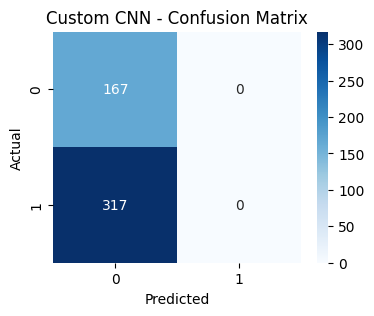


📄 Custom CNN Classification Report
              precision    recall  f1-score   support

           0       0.35      1.00      0.51       167
           1       0.00      0.00      0.00       317

    accuracy                           0.35       484
   macro avg       0.17      0.50      0.26       484
weighted avg       0.12      0.35      0.18       484



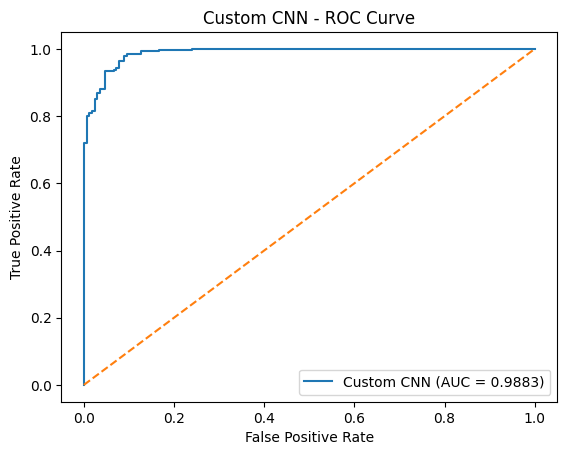


Evaluating MobileNetV2
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 799ms/step


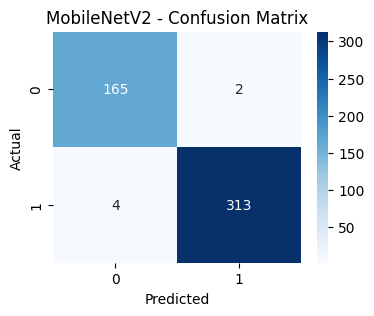


📄 MobileNetV2 Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       167
           1       0.99      0.99      0.99       317

    accuracy                           0.99       484
   macro avg       0.98      0.99      0.99       484
weighted avg       0.99      0.99      0.99       484



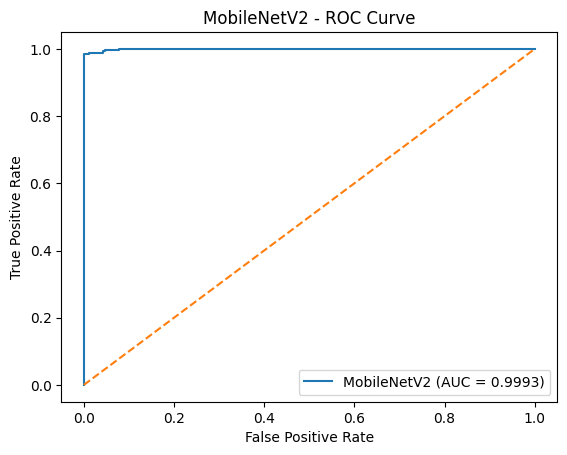


Evaluating ResNet50
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 830ms/step


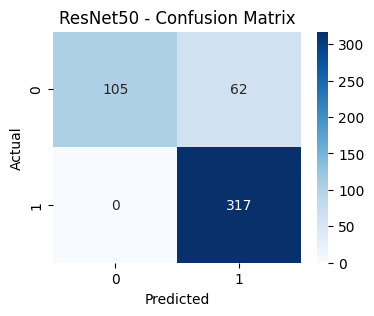


📄 ResNet50 Classification Report
              precision    recall  f1-score   support

           0       1.00      0.63      0.77       167
           1       0.84      1.00      0.91       317

    accuracy                           0.87       484
   macro avg       0.92      0.81      0.84       484
weighted avg       0.89      0.87      0.86       484



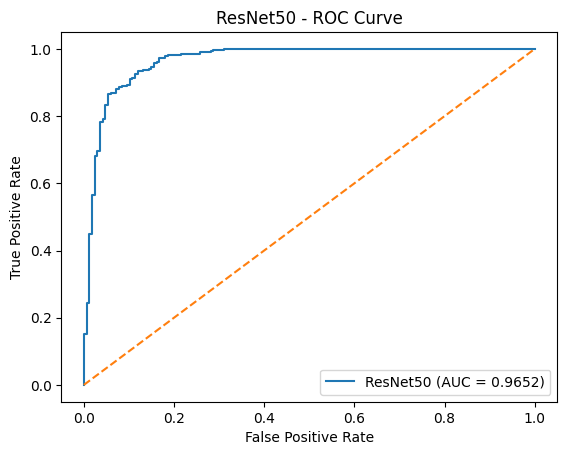

In [21]:
print("\nEvaluating Custom CNN")
cnn_auc = evaluate_model(cnn_model, "Custom CNN")

print("\nEvaluating MobileNetV2")
mobilenet_auc = evaluate_model(mobilenet_model, "MobileNetV2")

print("\nEvaluating ResNet50")
resnet_auc = evaluate_model(resnet_model, "ResNet50")

In [22]:
print("\nFINAL MODEL COMPARISON")
print("-------------------------------------------------")
print(f"Custom CNN     | Accuracy: {cnn_acc:.4f} | AUC: {cnn_auc:.4f}")
print(f"MobileNetV2    | Accuracy: {mobilenet_acc:.4f} | AUC: {mobilenet_auc:.4f}")
print(f"ResNet50       | Accuracy: {resnet_acc:.4f} | AUC: {resnet_auc:.4f}")
print("-------------------------------------------------")



FINAL MODEL COMPARISON
-------------------------------------------------
Custom CNN     | Accuracy: 0.3450 | AUC: 0.9883
MobileNetV2    | Accuracy: 0.9876 | AUC: 0.9993
ResNet50       | Accuracy: 0.8719 | AUC: 0.9652
-------------------------------------------------


In [25]:
import warnings
warnings.filterwarnings("ignore")

In [26]:
mobilenet_model.save("mobilenet_model.keras")
resnet_model.save("resnet_model.keras")
cnn_model.save("cnn_model.keras")